In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("Pune house data.csv")

In [3]:
df1.head(10)

,area_type,availability,size,site_location,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,2 BHK,Alandi Road,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,Ambegaon Budruk,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,Anandnagar,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,Aundh,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,Aundh Road,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,2 BHK,Balaji Nagar,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,4 BHK,Baner,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,4 BHK,Baner road,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,3 BHK,Bhandarkar Road,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,6 Bedroom,Bhavani Peth,NaN,1020,6.0,NaN,370.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['availability','society','balcony'],axis='columns')

In [7]:
df2.head()

,area_type,size,site_location,total_sqft,bath,price
0,Super built-up Area,2 BHK,Alandi Road,1056,2.0,39.07
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600,5.0,120.00
2,Built-up Area,3 BHK,Anandnagar,1440,2.0,62.00
3,Super built-up Area,3 BHK,Aundh,1521,3.0,95.00
4,Super built-up Area,2 BHK,Aundh Road,1200,2.0,51.00


#Data Cleaning

In [8]:
df2.isnull()

,area_type,size,site_location,total_sqft,bath,price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
13315,False,False,False,False,False,False
13316,False,False,False,False,False,False
13317,False,False,False,False,False,False
13318,False,False,False,False,False,False


In [9]:
df2.isnull().sum()

area_type         0
size             16
site_location     1
total_sqft        0
bath             73
price             0
dtype: int64

drop the values since number of rows having NA values are far less compared to the actual number of observations(13320)

In [10]:
df3 = df2.dropna()
df3.head()

,area_type,size,site_location,total_sqft,bath,price
0,Super built-up Area,2 BHK,Alandi Road,1056,2.0,39.07
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600,5.0,120.00
2,Built-up Area,3 BHK,Anandnagar,1440,2.0,62.00
3,Super built-up Area,3 BHK,Aundh,1521,3.0,95.00
4,Super built-up Area,2 BHK,Aundh Road,1200,2.0,51.00


In [11]:
df3.isnull().sum()

area_type        0
size             0
site_location    0
total_sqft       0
bath             0
price            0
dtype: int64

In [12]:
df3.shape

(13246, 6)

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
#We are applying a custom function(lambda) while creating a new column on all the values of the size column
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]) )  #split gives 2 tokens, that are separated by space, thus to get only the first value, use [0]

C:\Users\Mahima Nair\AppData\Local\Temp\ipykernel_10928\1481111146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]) )  #split gives 2 tokens, that are separated by space, thus to get only the first value, use [0]


In [15]:
df3.head()

,area_type,size,site_location,total_sqft,bath,price,bhk
0,Super built-up Area,2 BHK,Alandi Road,1056,2.0,39.07,2
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600,5.0,120.00,4
2,Built-up Area,3 BHK,Anandnagar,1440,2.0,62.00,3
3,Super built-up Area,3 BHK,Aundh,1521,3.0,95.00,3
4,Super built-up Area,2 BHK,Aundh Road,1200,2.0,51.00,2


In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3[df3.bhk>20]

,area_type,size,site_location,total_sqft,bath,price,bhk
1718,Super built-up Area,27 BHK,Uruli Devachi,8000,27.0,230.0,27
4684,Plot Area,43 Bedroom,Salunke Vihar,2400,40.0,660.0,43


43 bedroom and 2400 sqft??? clearly an error/ ambuigity of knowledge. We need to clean the dataset such that it is not contradicting the basic knowledge

In [18]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

data type of sqft is object and in some cases range is present as 1133-1384

In [19]:
#to check if the paricular value is number or not
def is_float(x):
    try:
        float(x)    #try converting the object value to float number
    except:
        return False   #when it is a range given, return false
    return True

In [20]:
#to check if the paricular value is number or not
df3[df3['total_sqft'].apply(is_float)]

,area_type,size,site_location,total_sqft,bath,price,bhk
0,Super built-up Area,2 BHK,Alandi Road,1056,2.0,39.07,2
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600,5.0,120.00,4
2,Built-up Area,3 BHK,Anandnagar,1440,2.0,62.00,3
3,Super built-up Area,3 BHK,Aundh,1521,3.0,95.00,3
4,Super built-up Area,2 BHK,Aundh Road,1200,2.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,Pashan,3453,4.0,231.00,5
13316,Super built-up Area,4 BHK,Paud Road,3600,5.0,400.00,4
13317,Built-up Area,2 BHK,Pirangut,1141,2.0,60.00,2
13318,Super built-up Area,4 BHK,Prabhat Road,4689,4.0,488.00,4


In [21]:
#To check the values that were not converted to float
df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,size,site_location,total_sqft,bath,price,bhk
30,Super built-up Area,4 BHK,Gultekdi,2100 - 2850,4.0,186.000,4
122,Super built-up Area,4 BHK,Ganeshkhind,3067 - 8156,4.0,477.000,4
137,Super built-up Area,2 BHK,Khadaki,1042 - 1105,2.0,54.005,2
165,Super built-up Area,2 BHK,Prabhat Road,1145 - 1340,2.0,43.490,2
188,Super built-up Area,2 BHK,Wakadewadi,1015 - 1540,2.0,56.800,2
410,Super built-up Area,1 BHK,Ganeshkhind,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,2 BHK,Prabhat Road,1195 - 1440,2.0,63.770,2
648,Built-up Area,9 Bedroom,Raviwar Peth,4125Perch,9.0,265.000,9
661,Super built-up Area,2 BHK,Tilak Road,1120 - 1145,2.0,48.130,2
672,Built-up Area,4 Bedroom,Alandi Road,3090 - 5002,4.0,445.000,4


In [22]:
df3[~df3['total_sqft'].apply(is_float)].shape

(190, 7)

There are ranges, sqmeter values, perch values of sqft in the values that are not converted into float. The ranges are converted to their median value and the squaremeter, perch, etc values will simply be dropped

In [23]:
#to convert the range of sqft to their median value and all other values to float/interger values
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
#test the function

In [25]:
convert_sqft_to_num('666')

666.0

In [26]:
convert_sqft_to_num('600-700')

650.0

In [27]:
convert_sqft_to_num('35sqft')

In [28]:
#Work on new dataframe
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,area_type,size,site_location,total_sqft,bath,price,bhk
0,Super built-up Area,2 BHK,Alandi Road,1056.0,2.0,39.07,2
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600.0,5.0,120.00,4
2,Built-up Area,3 BHK,Anandnagar,1440.0,2.0,62.00,3
3,Super built-up Area,3 BHK,Aundh,1521.0,3.0,95.00,3
4,Super built-up Area,2 BHK,Aundh Road,1200.0,2.0,51.00,2


In [29]:
df4.loc[30]

area_type        Super built-up  Area
size                            4 BHK
site_location                Gultekdi
total_sqft                     2475.0
bath                              4.0
price                           186.0
bhk                                 4
Name: 30, dtype: object

In [30]:
df4.head()

,area_type,size,site_location,total_sqft,bath,price,bhk
0,Super built-up Area,2 BHK,Alandi Road,1056.0,2.0,39.07,2
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600.0,5.0,120.00,4
2,Built-up Area,3 BHK,Anandnagar,1440.0,2.0,62.00,3
3,Super built-up Area,3 BHK,Aundh,1521.0,3.0,95.00,3
4,Super built-up Area,2 BHK,Aundh Road,1200.0,2.0,51.00,2


#Feature Engineering and Dimensionality Reduction

In [31]:
df5 = df4.copy()  #Deep copy of the dataframe

In [32]:
df5.head()

,area_type,size,site_location,total_sqft,bath,price,bhk
0,Super built-up Area,2 BHK,Alandi Road,1056.0,2.0,39.07,2
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600.0,5.0,120.00,4
2,Built-up Area,3 BHK,Anandnagar,1440.0,2.0,62.00,3
3,Super built-up Area,3 BHK,Aundh,1521.0,3.0,95.00,3
4,Super built-up Area,2 BHK,Aundh Road,1200.0,2.0,51.00,2


In [33]:
#price per sqft is an important feature to do the outlier detection in the later stage
df5.isnull().sum()

area_type         0
size              0
site_location     0
total_sqft       46
bath              0
price             0
bhk               0
dtype: int64

In [34]:
df5 = df5.dropna()

In [35]:
df5.isnull().sum()

area_type        0
size             0
site_location    0
total_sqft       0
bath             0
price            0
bhk              0
dtype: int64

In [36]:
#price per sqft is an important feature to do the outlier detection in the later stage
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,size,site_location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,2 BHK,Alandi Road,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,3 BHK,Anandnagar,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,3 BHK,Aundh,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,2 BHK,Aundh Road,1200.0,2.0,51.00,2,4250.000000


In [37]:
df5.shape

(13200, 8)

In [38]:
len(df5.site_location.unique())
#no. of sites==97==huge
#dimensionality curse
#hence we can include 'other' catergory in the location and reduce the number of site location by reducing the observations having rare locoationss

97

In [39]:
#To remove leading spaces and ending spaces if any
df5.site_location = df5.site_location.apply(lambda x:x.strip()) 
location_stats = df5.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Kasba Peth         139
Bibvewadi          139
Mangalwar peth     139
Ambegaon Budruk    139
Gokhale Nagar      139
                  ... 
Model colony       135
Fatima Nagar       135
Wakadewadi         134
Vadgaon Budruk     133
other                1
Name: site_location, Length: 97, dtype: int64

In [40]:
#All locations have a count of 135 minimum which is a significant number hence no transformation to other is required

#outlier detection and removal
outliers: extreme variations or data errors that can create issue in analysis or model building

Outlier can be removed by 
1. Std deviation method( detect the outliers and normalize the data)
2. Domain knowledge

In [41]:
#domain knowledge 1: 2 bhk house will have at least 500 sqft
#Sqft per bedroom: 300 (ask the business manager)
df5[df5.total_sqft/df5.bhk<300].head()   #show all locations whose data is incorrect/anomalous

,area_type,size,site_location,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,6 Bedroom,Bhavani Peth,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,8 Bedroom,Kondhwa Budruk,600.0,9.0,200.0,8,33333.333333
58,Plot Area,6 Bedroom,Mundhawa,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,8 Bedroom,Pirangut,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,3 Bedroom,Pune Railway Station,500.0,3.0,100.0,3,20000.000000


In [42]:
#there are 5 anomalies in the data. Remove these outliers
df6 = df5[~(df5.total_sqft/df5.bhk<300)]  #negate(~): return all those rows which doesnt satisfy the criteria

In [43]:
df6.head()

,area_type,size,site_location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,2 BHK,Alandi Road,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,4 Bedroom,Ambegaon Budruk,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,3 BHK,Anandnagar,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,3 BHK,Aundh,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,2 BHK,Aundh Road,1200.0,2.0,51.00,2,4250.000000


In [44]:
df6.shape

(12456, 8)

In [45]:
#detect extreme prices of the houses
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [46]:
#remove extreme cases of prices using standard deviation per location
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=m+st)]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out


In [47]:
df7 = remove_pps_outlier(df6)
df7.shape

(10883, 8)

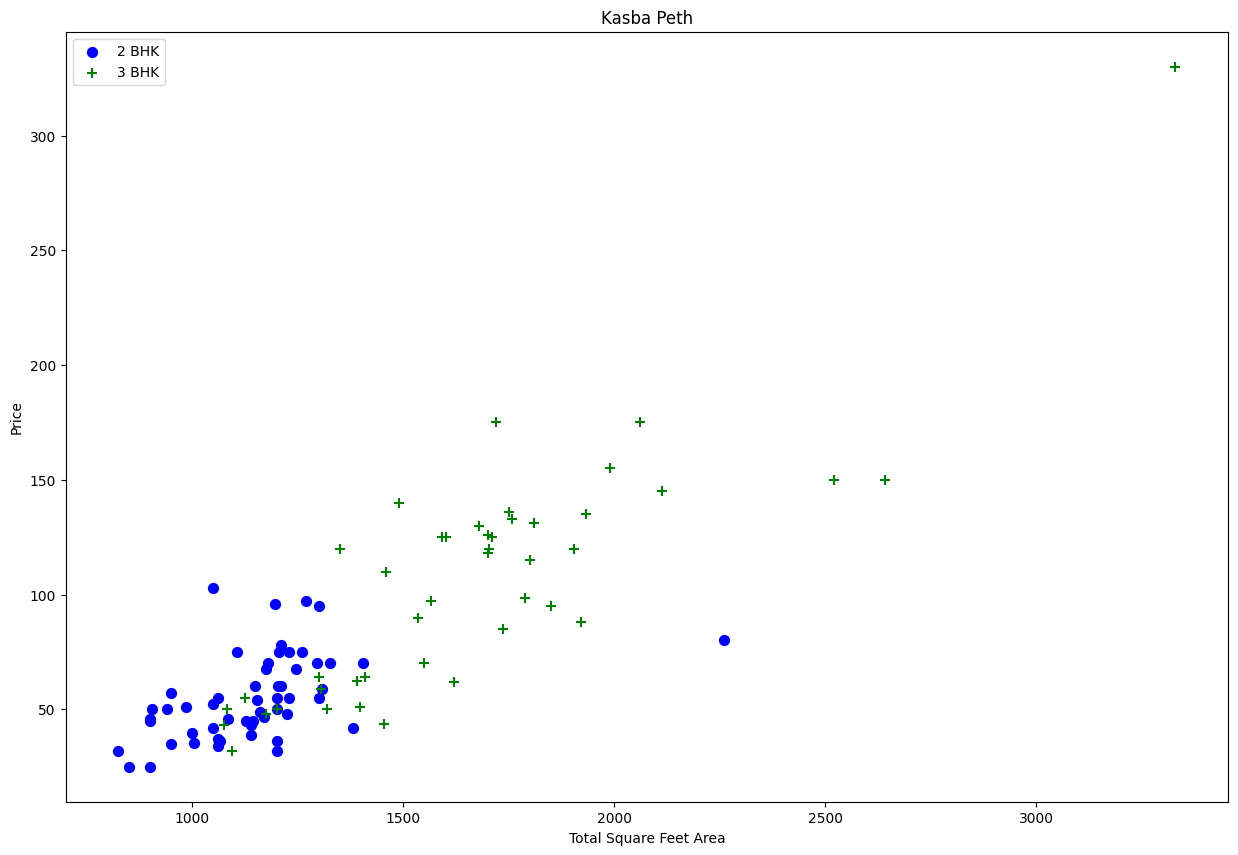

In [48]:
#another observation: property price of 3 bhk should be more than 2 bhk for same sqft and same location site
#Visualise this observation with scatter plot
def plot_scatter_chart(df,site_location):
    bhk2 = df[(df.site_location==site_location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==site_location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue', label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker="+", color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(site_location)
    plt.legend()

plot_scatter_chart(df7,"Kasba Peth")


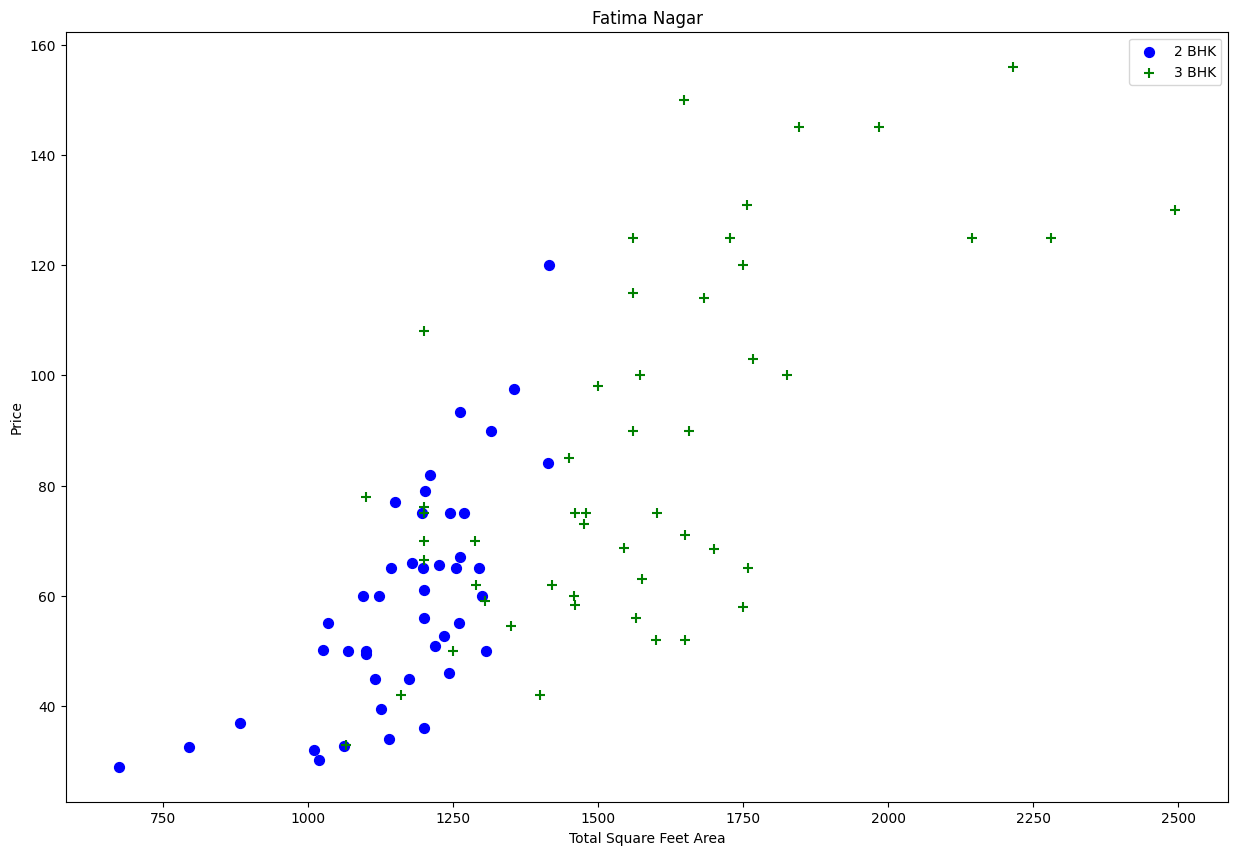

In [49]:
plot_scatter_chart(df7,"Fatima Nagar")

We should also remove properties where for same location, the price of(eg) 3 bhk is less than 2 BHK with same sqft. thus we will build a dictionary of stats per bhk i.e.

for each location
    for each bhk type
    {
        '1':{
            'mean':___,
            'std': ___'
            'count': ___
            },
        '2':{
            'mean':___,
            'std': ___'
            'count': ___
            },

 ...
        }

Now we remove those 2 BHK apt whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
            

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, location_df in df.groupby('site_location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
    
                
            

In [51]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7543, 8)

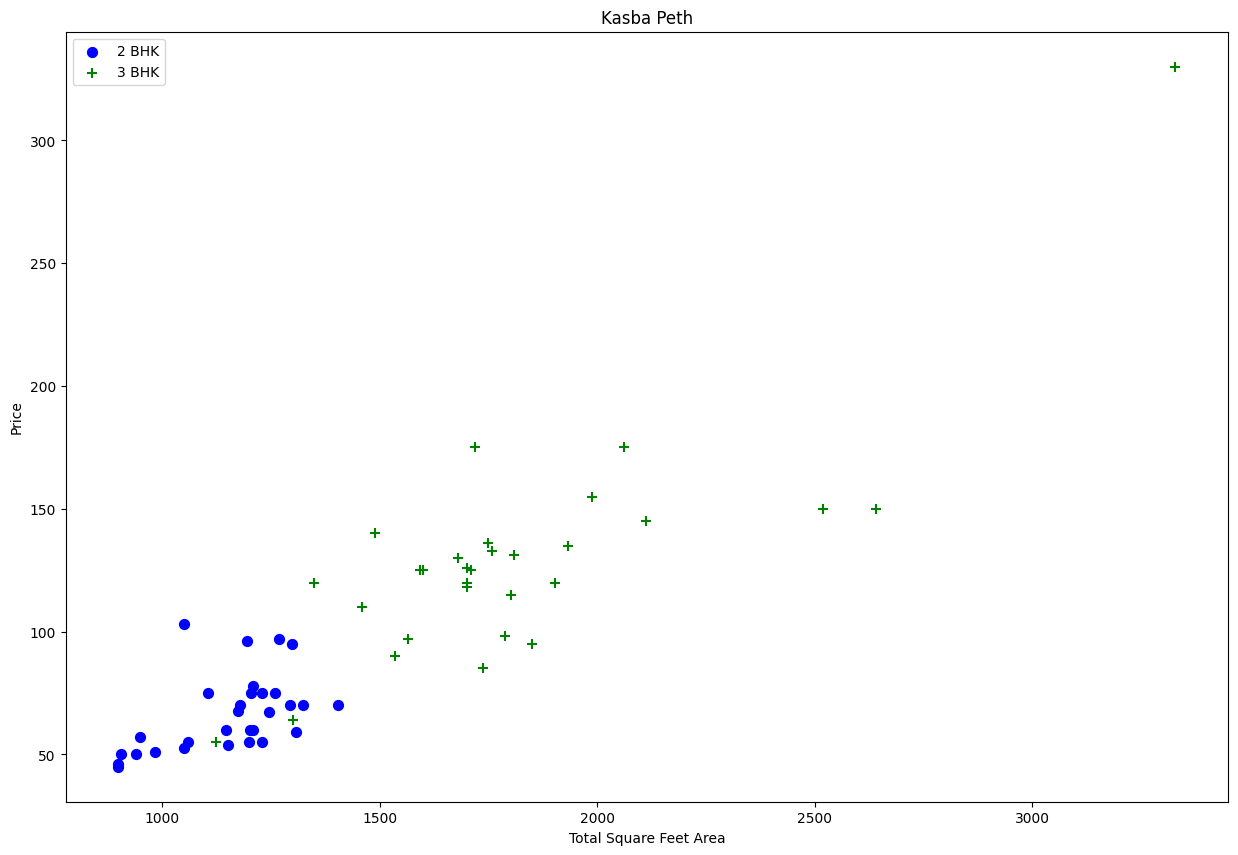

In [52]:
plot_scatter_chart(df8,"Kasba Peth")

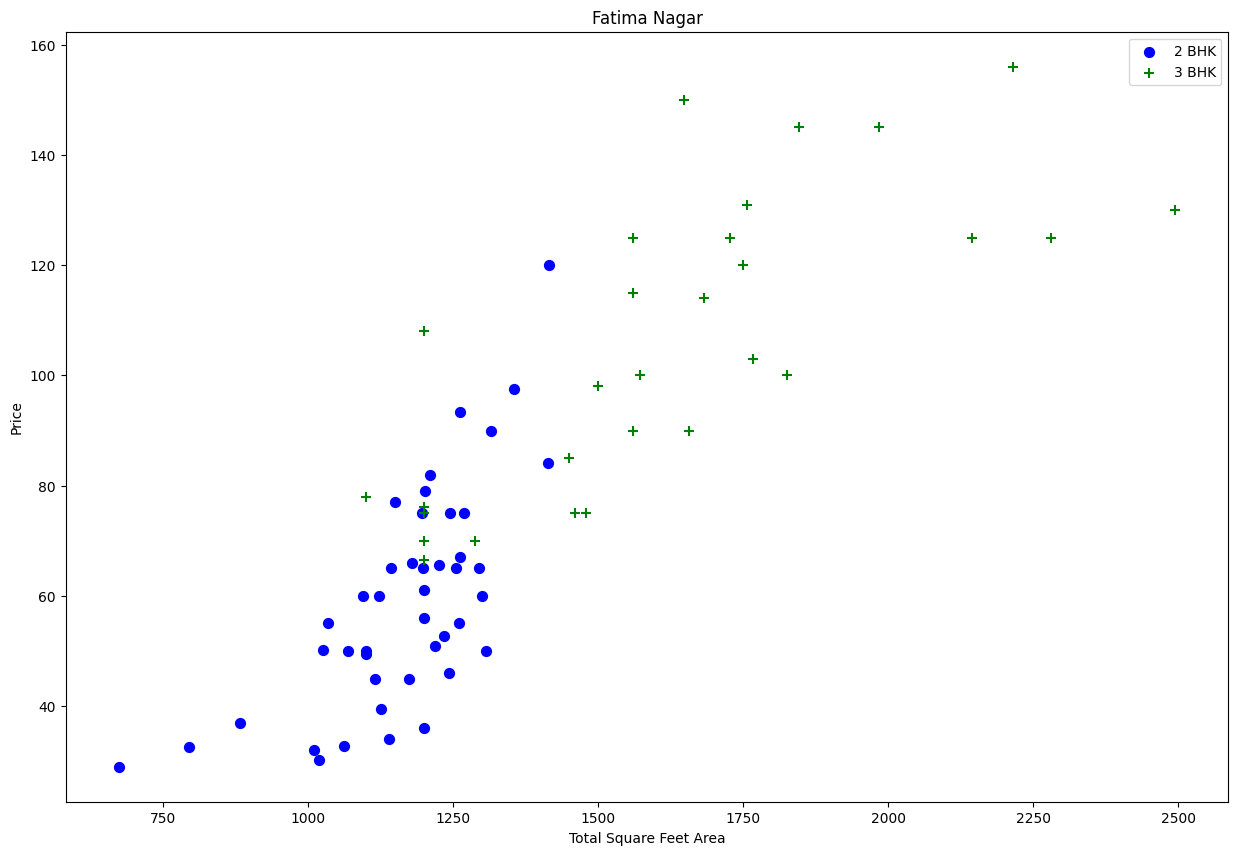

In [53]:
plot_scatter_chart(df8,"Fatima Nagar")

Text(0, 0.5, 'count')

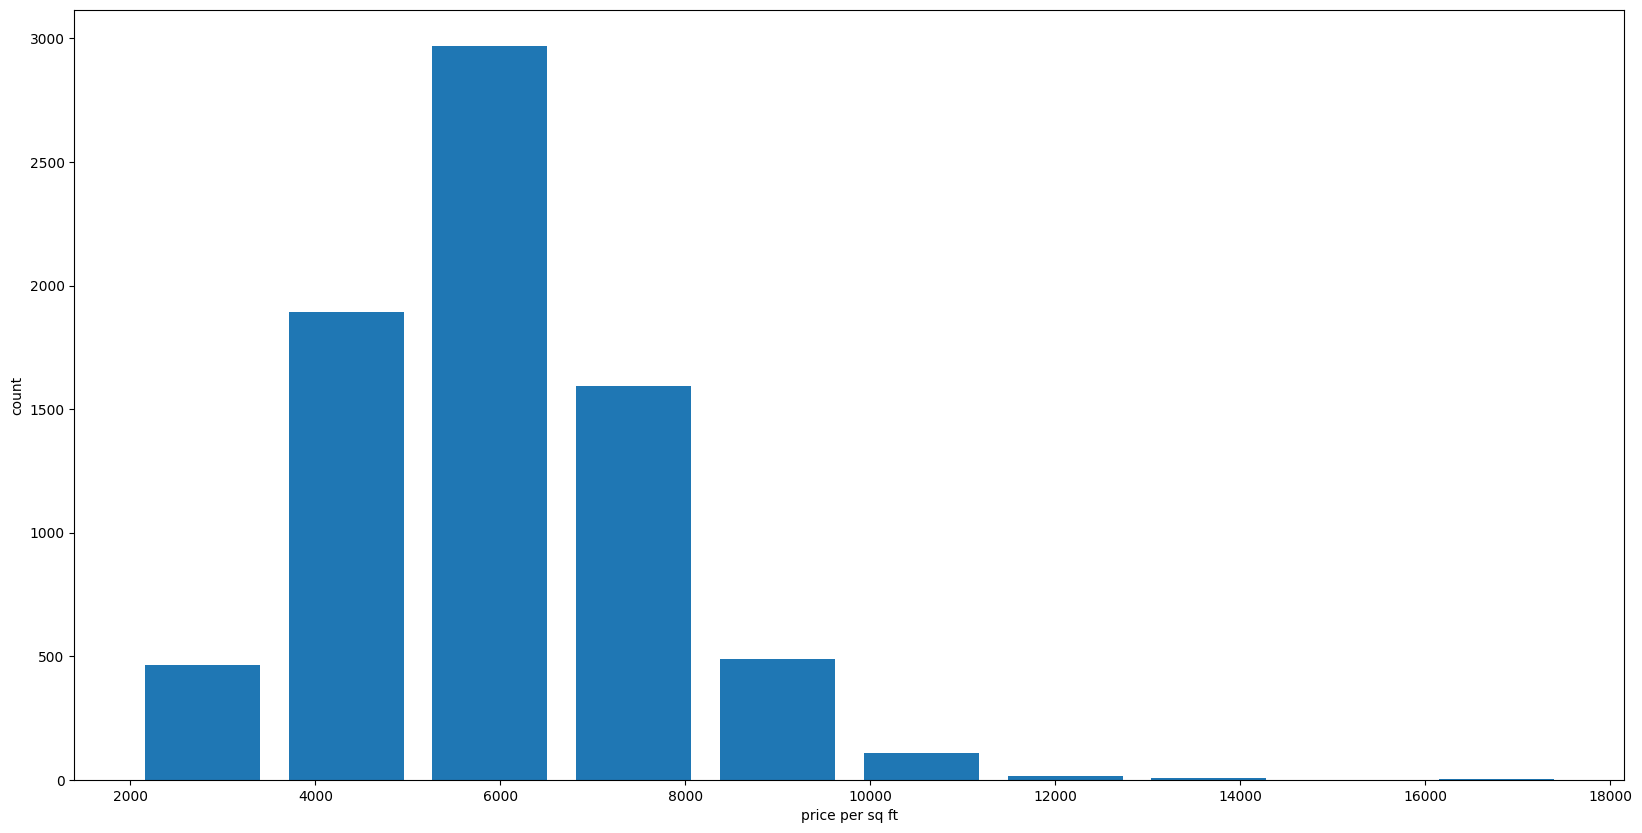

In [54]:
#to know if data is normally distributed, plot histogram
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("price per sq ft")
plt.ylabel("count")

The data is almost normally distributed with the bell curve being observed in the distribution

In [55]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [56]:
df8[df8.bath>10]

,area_type,size,site_location,total_sqft,bath,price,bhk,price_per_sqft
1211,Super built-up Area,11 BHK,Bibvewadi,6000.0,12.0,150.0,11,2500.000000
2637,Super built-up Area,10 BHK,Fatima Nagar,12000.0,12.0,525.0,10,4375.000000
5265,Super built-up Area,13 BHK,Kondhwa Khurd,5425.0,13.0,275.0,13,5069.124424
6350,Super built-up Area,16 BHK,Model colony,10000.0,16.0,550.0,16,5500.000000
10389,Super built-up Area,10 BHK,Wagholi,4000.0,12.0,160.0,10,4000.000000


#Domain knowledge to remove bathroom outlier
#No of bath> No. of bhk-->anomaly

Text(0, 0.5, 'count')

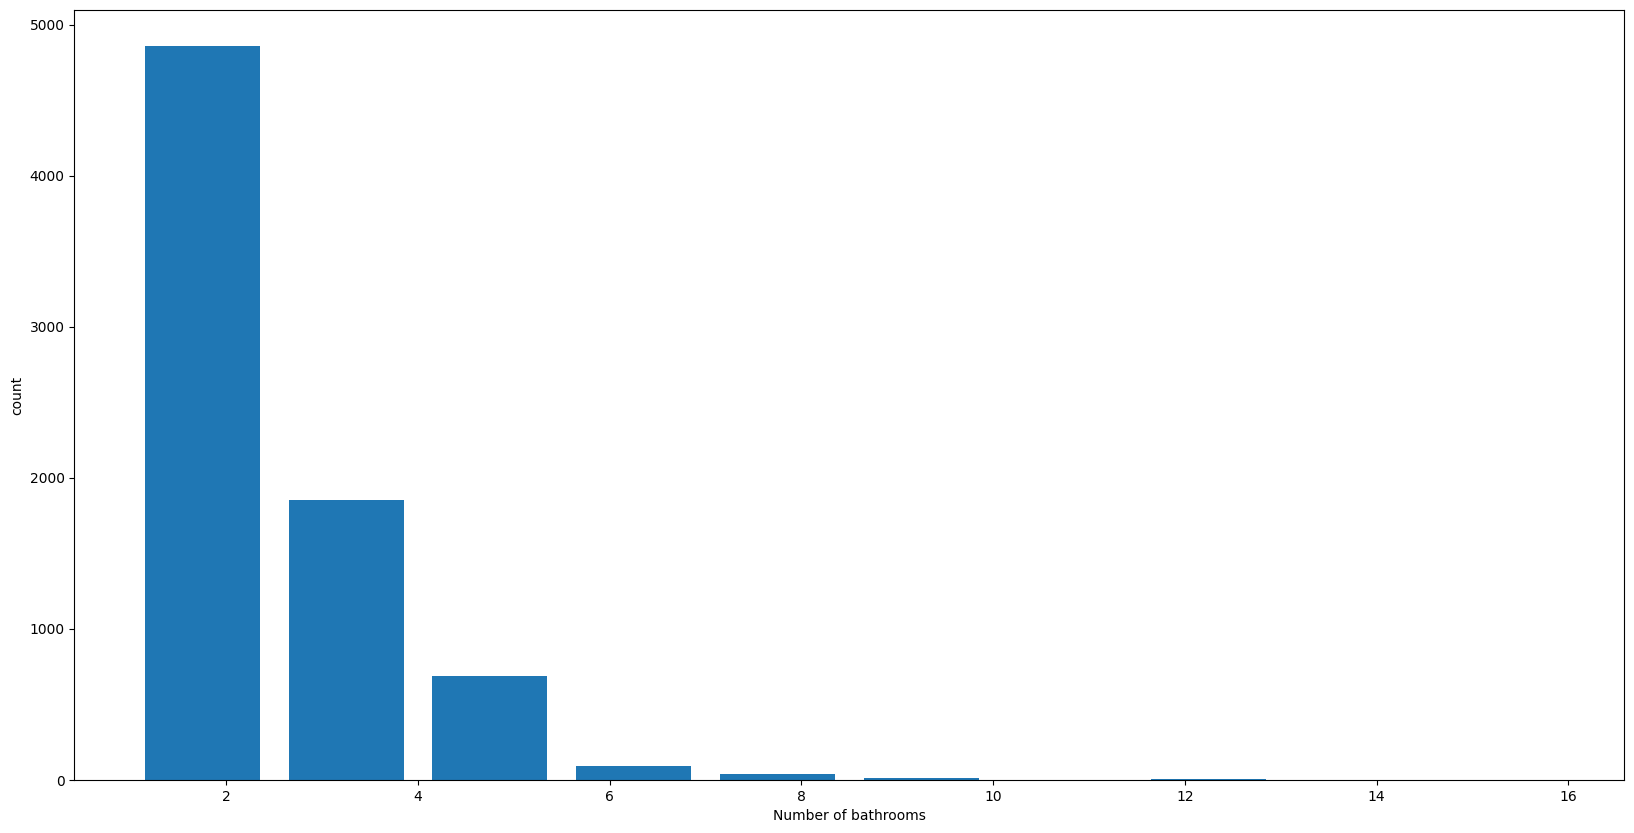

In [57]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [58]:
df8[df8.bath>df8.bhk+2]

,area_type,size,site_location,total_sqft,bath,price,bhk,price_per_sqft
772,Super built-up Area,3 BHK,Baner,1806.0,6.0,116.0,3,6423.034330
3067,Super built-up Area,6 BHK,Ghorpade Peth,11338.0,9.0,1000.0,6,8819.897689
4231,Built-up Area,4 Bedroom,Karve Nagar,7000.0,8.0,450.0,4,6428.571429


In [59]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 8)

In [60]:
#Model preparation
#Drop preice_per_sqft since it was used for outlier detection and drop size object feature
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,area_type,site_location,total_sqft,bath,price,bhk
0,Super built-up Area,Alandi Road,1056.0,2.0,39.07,2
1,Plot Area,Alandi Road,2894.0,4.0,245.00,4
2,Super built-up Area,Alandi Road,1084.0,2.0,50.00,2
3,Super built-up Area,Alandi Road,1230.0,2.0,80.00,2
4,Super built-up Area,Alandi Road,1750.0,3.0,130.00,3


In [61]:
df10['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [62]:
#Text to numerical by one hot encoding since ML model can only read numerical values
#for simplicity, we will drop area_type as well
df11 = df10.drop('area_type', axis='columns')
df11.head()

,site_location,total_sqft,bath,price,bhk
0,Alandi Road,1056.0,2.0,39.07,2
1,Alandi Road,2894.0,4.0,245.00,4
2,Alandi Road,1084.0,2.0,50.00,2
3,Alandi Road,1230.0,2.0,80.00,2
4,Alandi Road,1750.0,3.0,130.00,3


In [63]:
#use get_dummies function of pandas to perform one hot encoding(changing categorical to binary attributes)
dummies = pd.get_dummies(df11.site_location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
print(dummies.columns)

Index(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road',
       'Balaji Nagar', 'Baner', 'Baner road', 'Bhandarkar Road',
       'Bhavani Peth', 'Bibvewadi', 'Bopodi', 'Budhwar Peth',
       'Bund Garden Road', 'Camp', 'Chandan Nagar', 'Dapodi',
       'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
       'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Ghorpadi', 'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Hingne Khurd', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk',
       'Kondhwa Khurd', 'Koregaon Park', 'Kothrud', 'Law College Road',
       'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar', 'Mundhawa',


In [65]:
df12 = pd.concat([df11,dummies.drop('Yerawada',axis='columns')], axis='columns') #to avoid a dummy variable trap in one hot encoding, we can drop one column and to represent the value of 1st column use 00000...00
df12.head()

,site_location,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje
0,Alandi Road,1056.0,2.0,39.07,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Alandi Road,2894.0,4.0,245.00,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Alandi Road,1084.0,2.0,50.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alandi Road,1230.0,2.0,80.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Alandi Road,1750.0,3.0,130.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
df13 = df12.drop('site_location', axis='columns')
df13.head()

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje
0,1056.0,2.0,39.07,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,50.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,80.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,130.00,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
#Data good for model building
df13.shape

(7479, 99)

In [68]:
#x= independent variable
X = df13.drop('price', axis='columns')
X.head(3)

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje
0,1056.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
Y = df13.price
Y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [70]:
#Train test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

Linear Model Fitting and Training

In [71]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
linearModel.score(X_test, y_test)

0.8234642712561874

In [73]:
#To improve the accuracy by k folds cross validation of dataset to find optimal mix of data that provides max information and makes a good model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.87729294, 0.87158074, 0.82825079, 0.89763339, 0.81068616])

Running the model 5 times and in all 5 times, we are dividing the X, Y in 5 different spilts, considering one spilt in each iteration as test and remaining
We see that all of the 5 splits have score >80%


In [86]:
#To try different regressor models and find out which one gives the best score
#Use Grid Search CV for this method

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridSearchCV(X,y):
    #python dictionary of algos to compare
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                #'normalize':[True, False]
            }
        },
        'lasso' :{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['squared_error','friedman_mse'],
                'splitter':['best', 'random']
            }
        }
    }
    
#The gridSearch method will not only search the best model, but will also find the best hyperparameters for the model. This is known as Hyperparameter Tuning
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        #Training each of the model and finding the score might take time

        #return the score of each of the model for us to evaluate the best one
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])


In [88]:
find_best_model_using_gridSearchCV(X,Y)

,model,best_score,best_params
0,linear_regression,0.857089,{}
1,lasso,0.857851,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.752978,"{'criterion': 'squared_error', 'splitter': 'be..."


In [84]:
"""
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

def find_best_model_using_gridSearchCV(X, y):
    # Python dictionary of algorithms to compare
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    # The GridSearch method will not only search the best model,
    # but will also find the best hyperparameters for the model.
    # This is known as Hyperparameter Tuning
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        # Training each of the models and finding the score might take time

    # Return the score of each of the models for us to evaluate the best one
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridSearchCV(X,Y)
""


In [89]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'Alandi Road', 'Ambegaon Budruk',
       'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar', 'Baner',
       'Baner road', 'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar', 'Dapodi',
       'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
       'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Ghorpadi', 'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Hingne Khurd', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk',
       'Kondhwa Khurd', 'Koregaon Park', 'Kothrud', 'Law College Road',
       'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony',

In [90]:
np.where(X.columns=='Lulla Nagar')[0][0]   #used to find the index of that particular column in dataframe(column header)

54

In [91]:
#both linear and lasso is giving a good result compared to decision tree
#Choosing Linear(85.7%) score 
#linear is already trained in cell 71

def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]  #find location index and set that particular index value in predict array to 1 thereby converting it to binary for simpler model built
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
    return linearModel.predict([x])[0]


In [93]:
predict_price('Aundh', 1500,3,3)

C:\Users\Mahima Nair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.97685707061218

In [94]:
predict_price('Aundh', 1500,2,2)

C:\Users\Mahima Nair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.4524854131406

In [95]:
predict_price('Alandi Road', 1500,3,3)

C:\Users\Mahima Nair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.7109330529533

In [96]:
predict_price('Alandi Road', 1000,2,2)

C:\Users\Mahima Nair\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


52.658446119690566

Model built complete!! :) now export it to a pickle file for permanent storage and to be used by python flask server

In [97]:
#Export the model to a pickle file to be used by python flask Server
import pickle
with open('Pune_House_Price_Prediction_Model.pickle','wb') as f:
    pickle.dump(linearModel,f)


#this pickle file is only storing the linear regression model i.e. the coefficient values and doesn't have any data/ variables associated with it

In [98]:
#It is important to know the column names as well and the order in which the feature names are stored in the model
#These column/feature names are stored in Json file for ease

import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))